# Лабораторная работа №1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re
from matplotlib.lines import Line2D
%matplotlib inline
matplotlib.style.use('seaborn-poster')
matplotlib.style.use('seaborn-pastel')

## 1.	Загрузите данные в ноутбук

In [2]:
data = pd.read_excel('Вариант 3.xlsx', 
                     header=2, 
                     index_col='№',
                     dtype={'Первичный балл	': np.float64,
                            'Балл': np.float64,
                            'Минимальный балл': np.float64})
data.drop(data.tail(1).index,inplace=True)
data.tail()

,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
№,,,,,,,,,,
1176.0,148.0,11,М,332.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)2(3),NaN,51.0,98.0,36.0
1177.0,148.0,11,М,330.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)2(3),NaN,51.0,98.0,36.0
1178.0,152.0,11,Ж,330.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)2(3)3(3),NaN,51.0,98.0,36.0
1179.0,147.0,11,М,332.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)3(3),NaN,52.0,100.0,36.0
1180.0,148.0,11,М,328.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)3(3),NaN,52.0,100.0,36.0


In [3]:
data.dtypes

№ школы                          float64
Класс                             object
Пол                               object
Номер варианта                   float64
Задания с кратким ответом         object
Задания с развёрнутым ответом     object
Устная часть                      object
Первичный балл                   float64
Балл                             float64
Минимальный балл                 float64
dtype: object

## 2.	Сделайте описательную статистику по среднему баллу

In [4]:
data['Балл'].describe()

count    1180.000000
mean       52.047458
std        14.965477
min        10.000000
25%        41.000000
50%        49.000000
75%        60.250000
max       100.000000
Name: Балл, dtype: float64

## 3.	Найдите процент учащихся, выполнивших работу ниже среднего

In [5]:
pr = round(data[data['Балл'] < data['Балл'].mean()]['Балл'].count() / data['Балл'].count() * 100, 2)
print(f'Процент учащихся, набравших меньше среднего = {pr}%')

Процент учащихся, набравших меньше среднего = 56.27%


## 4.	Найти процент учащихся не сдавших экзамен

In [6]:
pr = round(data[data['Балл'] < data['Минимальный балл']]['Балл'].count() / data['Балл'].count() * 100, 2)
print(f'Процент учащихся, не сдавших экзамен = {pr}%')

Процент учащихся, не сдавших экзамен = 7.71%


## 5.	Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

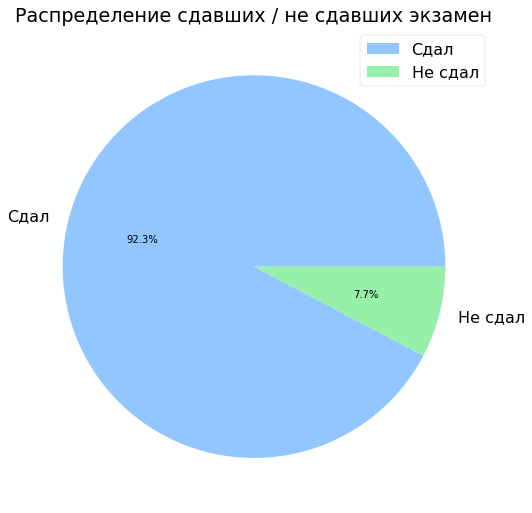

In [7]:
not_passed = round(data[data['Балл'] < data['Минимальный балл']]['Балл'].count() / data['Балл'].count() * 100, 2)
plt.pie([100 - not_passed, not_passed], labels=['Сдал', 'Не сдал'], autopct='%1.1f%%')
plt.title('Распределение сдавших / не сдавших экзамен')
plt.legend(['Сдал', 'Не сдал'])
plt.show()

## 6.	Постройте гистограмму по распределению баллов за экзамен. Соответствует ли оно нормальному распределению?

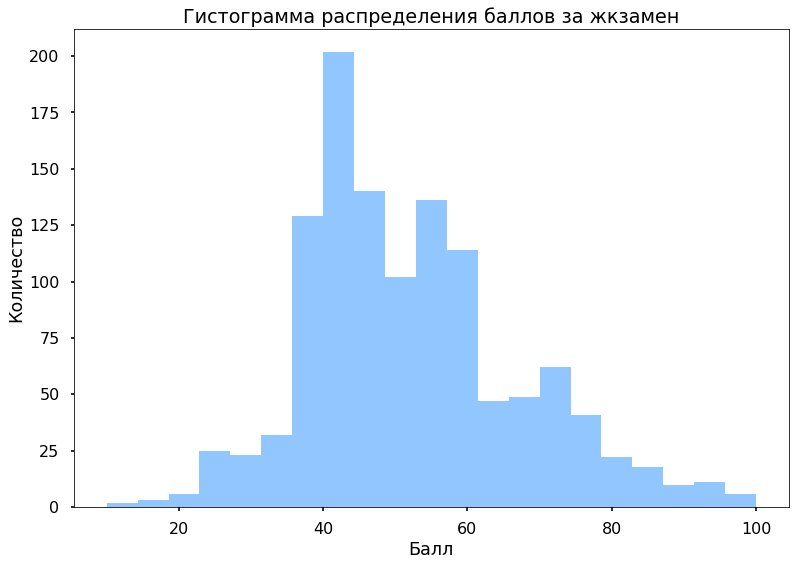

In [8]:
plt.hist(data["Балл"], bins=21)
plt.title('Гистограмма распределения баллов за экзамен')
plt.ylabel('Количество')
plt.xlabel('Балл')
plt.show()

__Нормальному распределению ...

## 7.	Постройте оценку ядерной плотности распределению баллов за экзамен

Text(0.5, 1.0, 'Оценка ядерной плотности распределения баллов')

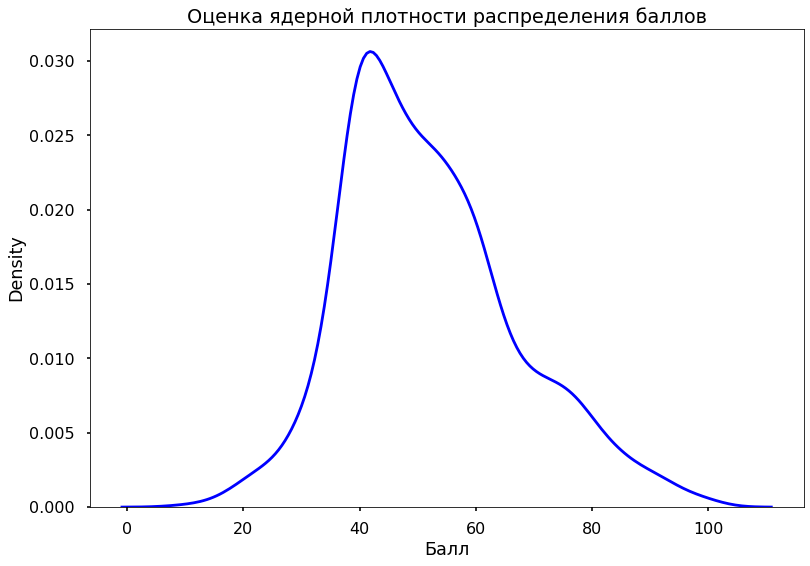

In [9]:
import seaborn as sns

sns.kdeplot(data['Балл'], color='b').set_title("Оценка ядерной плотности распределения баллов")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Оценка ядерной плотности распределения баллов')

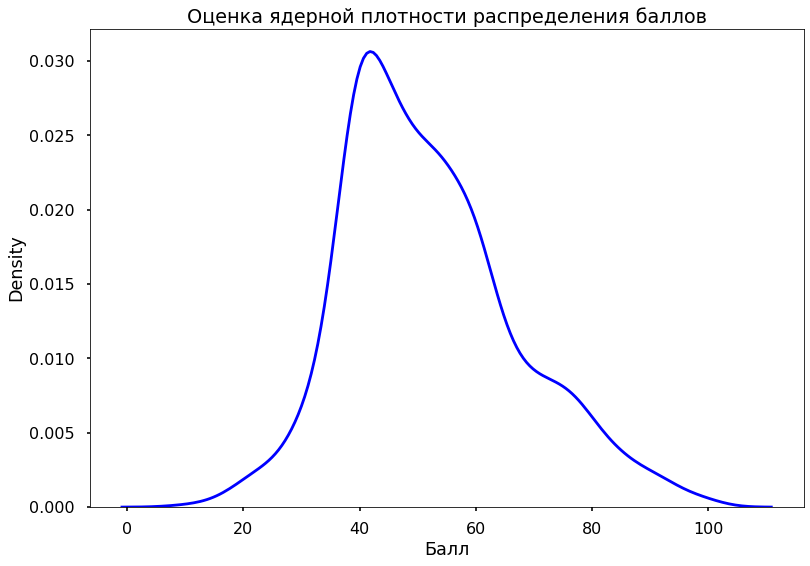

In [10]:
sns.distplot(data['Балл'], hist=False, color='blue').set_title("Оценка ядерной плотности распределения баллов")

## 8.	Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно». Сделайте графическое представление данного распределения

In [11]:
r2 = round(data[data['Балл'] <= 35]['Балл'].count() / data['Балл'].count() * 100, 2)
r3 = round(data[(data['Балл'] > 35) & (data['Балл'] <= 50)]['Балл'].count() / data['Балл'].count() * 100, 2)
r4 = round(data[(data['Балл'] > 50) & (data['Балл'] <= 75)]['Балл'].count() / data['Балл'].count() * 100, 2)
r5 = round(data[data['Балл'] > 75]['Балл'].count() / data['Балл'].count() * 100, 2)
r2, r3, r4, r5

(7.71, 42.71, 40.42, 9.15)

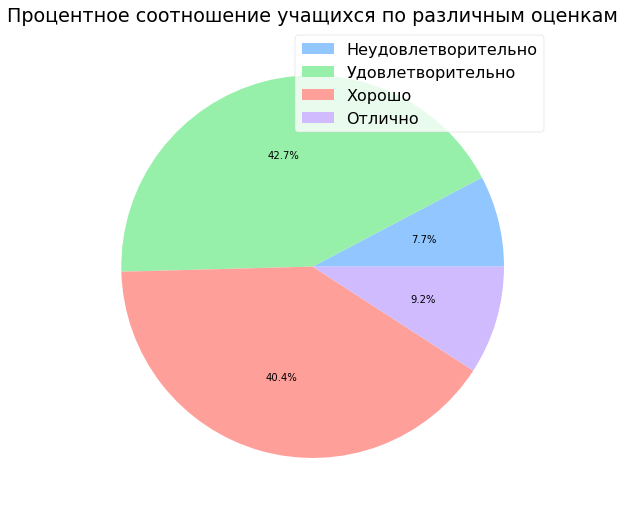

In [12]:
plt.pie([r2, r3, r4, r5], autopct='%1.1f%%')
plt.legend(['Неудовлетворительно', 'Удовлетворительно', 'Хорошо', 'Отлично'])
plt.title('Процентное соотношение учащихся по различным оценкам')
plt.show()

## 9.	Постройте «ящиковые диаграммы», сравнивающие баллы учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно»

In [13]:
r2 = data[data['Балл'] <= 35]['Балл']
r3 = data[(data['Балл'] > 35) & (data['Балл'] <= 50)]['Балл']
r4 = data[(data['Балл'] > 50) & (data['Балл'] <= 75)]['Балл']
r5 = data[data['Балл'] > 75]['Балл']

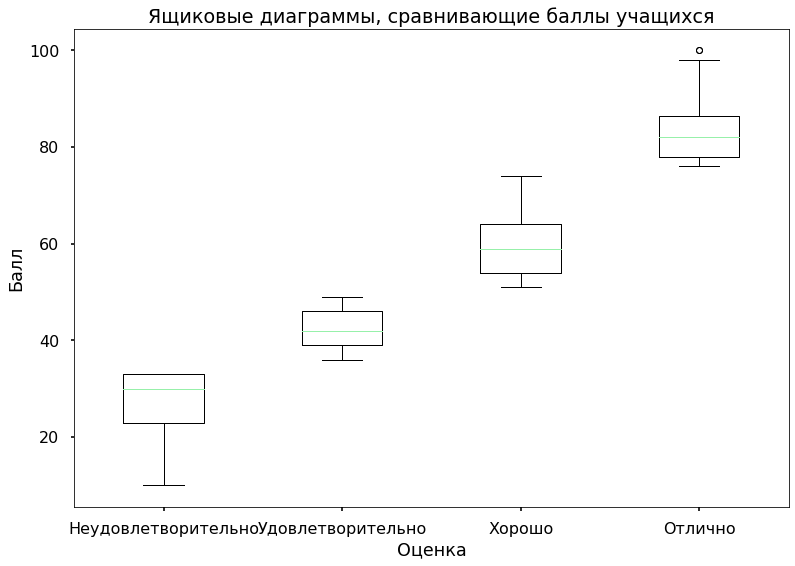

In [14]:
plt.boxplot([r2, r3, r4, r5], 
            labels = ['Неудовлетворительно', 'Удовлетворительно', 'Хорошо', 'Отлично'])
            #,patch_artist=True)
#plt.legend(['Неудовлетворительно', 'Удовлетворительно', 'Хорошо', 'Отлично'])
plt.title('Ящиковые диаграммы, сравнивающие баллы учащихся')
plt.xlabel('Оценка')
plt.ylabel('Балл')
plt.show()

## 10.	Какое процентное соотношение юношей и девушек писало данный экзамен? Представьте графически

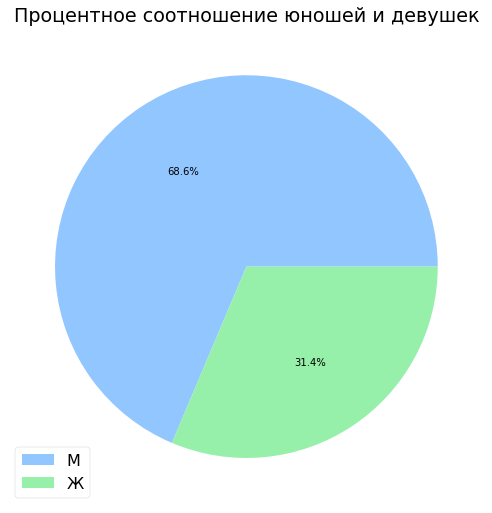

In [15]:
women = round(data[data['Пол'] == 'Ж']['Пол'].count() / data['Пол'].count() * 100, 2)
plt.pie([100 - women, women], autopct='%1.1f%%')
plt.title('Процентное соотношение юношей и девушек')
plt.legend(['М', 'Ж'])
plt.show()

## 11.	Постройте диаграмму рассеивания, позволяющую увидеть средние баллы девушек и юношей

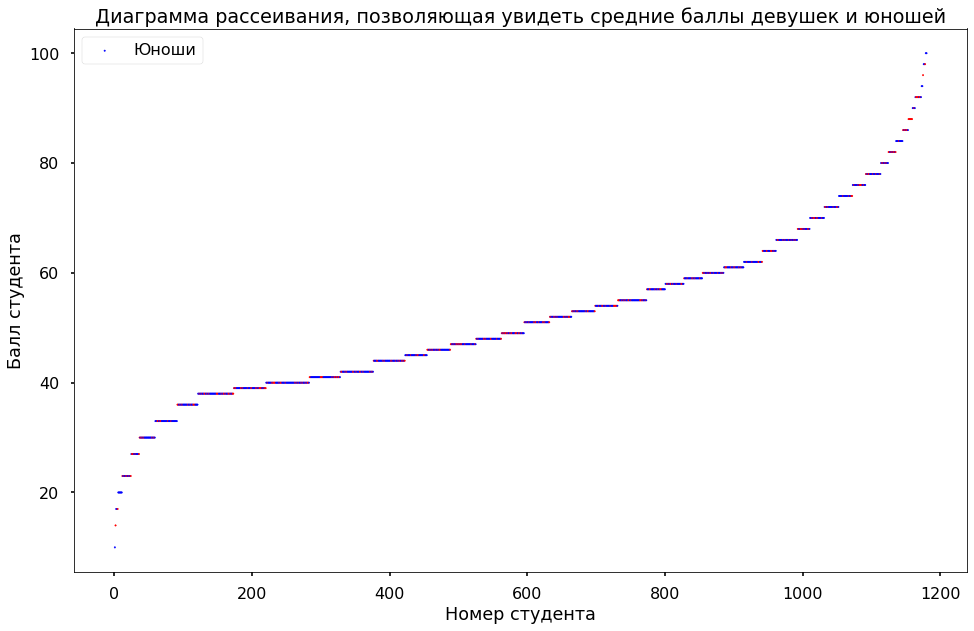

In [16]:
plt.figure(figsize=(16, 10))
ax = plt.scatter(data.reset_index()['№'], data['Балл'], c=np.where(data['Пол']=='М', 'blue', 'red'), s=2)
plt.legend(['Юноши', 'Девушки'])
plt.title('Диаграмма рассеивания, позволяющая увидеть средние баллы девушек и юношей')
plt.xlabel('Номер студента')
plt.ylabel('Балл студента')
plt.show()

## 12.	Сколько школ (код ППЕ) принимало участие в экзамене?

In [17]:
schools = data['№ школы'].unique()
print(f'В экзамене принимало участие {len(schools)} школ')

В экзамене принимало участие 19 школ


## 13.	Постройте диаграмму, позволяющую сравнить средние баллы за экзамен по школам. Если какие-нибудь выбросы?

In [18]:
points_grouped_by_schools = data.groupby('№ школы').groups
for key in points_grouped_by_schools.keys():
    points_grouped_by_schools[key] = data.loc[points_grouped_by_schools[key]]['Балл']
#points_grouped_by_schools

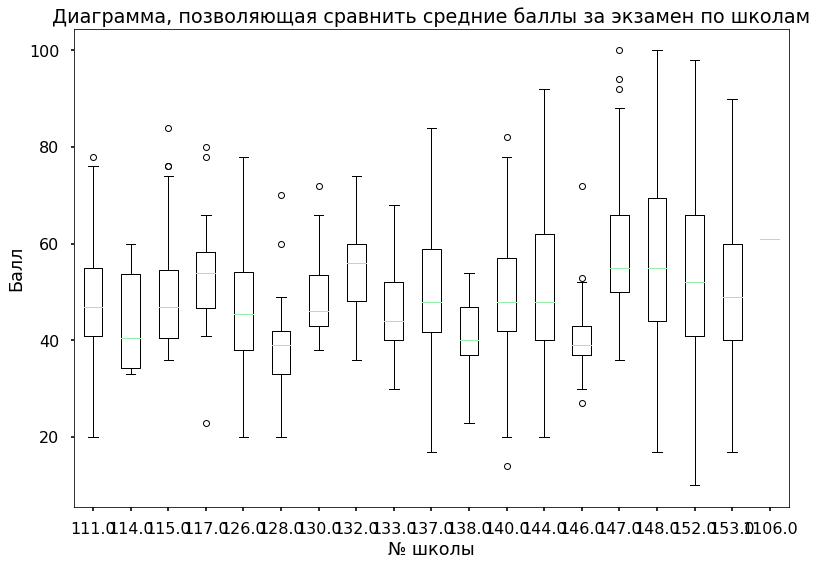

In [19]:
schools, points = points_grouped_by_schools.keys(), points_grouped_by_schools.values()

plt.boxplot(points,
            labels = schools)
plt.title('Диаграмма, позволяющая сравнить средние баллы за экзамен по школам')
plt.xlabel('№ школы')
plt.ylabel('Балл')
plt.show()

Да, выбросы имеются, например в .... школе сильно выделяется ученик, набравший ... балла. В других школах также имеются выбросы

# __Повышенной сложности:__

## 1.	Сколько всего заданий с кратким ответом? С развернутым ответом?

In [20]:
kr = len(data.loc[1]['Задания с кратким ответом'])
raz = data.loc[1]['Задания с развёрнутым ответом'].count('(')
print(f'Всего {kr} заданий с кратким ответов \nВсего {raz} заданий с развернутым ответов')

Всего 27 заданий с кратким ответов 
Всего 5 заданий с развернутым ответов


## 2.	Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В1 … Вк  Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. Постройте гистограмму, позволяю щую увидеть данное распределение. Какие есть выпады по данному распределению?

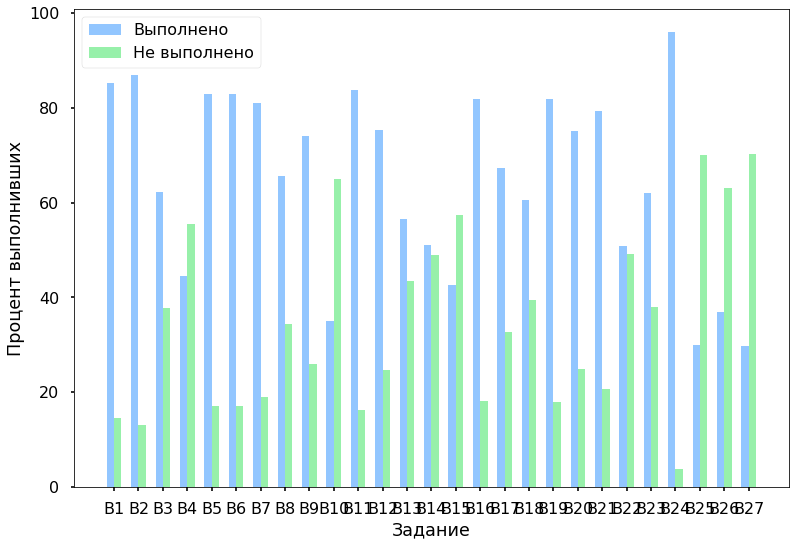

In [21]:
kratk = []
for row in data['Задания с кратким ответом']:
    kratk.append([c for c in row])
df = pd.DataFrame(kratk)
df = df.replace('0', 0).replace('-', 0).replace('1', 1).replace('+', 1).replace('2', 1)
#df = df[list(np.arange(0,27))].astype(int)
done = df.sum(axis=0) * 100 / df.shape[0]
not_done = 100 - done
#print(done, not_done)

cat_par = [f"B{i}" for i in range(1, len(done)+1)]

g1 = list(done)
g2 = list(not_done)

width = 0.3

x = np.arange(len(cat_par))

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, g1, width, label='Выполнено')
rects2 = ax.bar(x + width/2, g2, width, label='Не выполнено')

ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()

plt.xlabel('Задание')
plt.ylabel('Процент выполнивших')
plt.show()

Из явных выпадов видно, что с заданием B24 справилось подавляющее большинство сдававших

## 3.	Аналогично и с типом С (ответы с развернутым ответом)

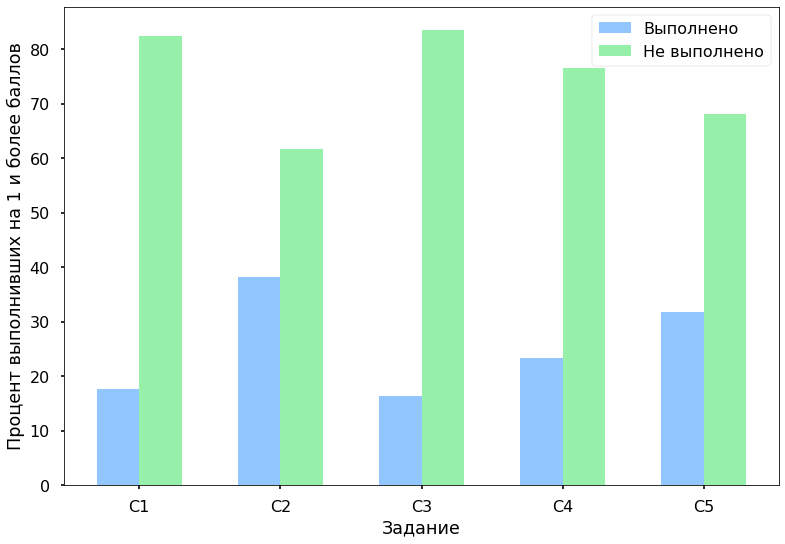

In [22]:
razv = []
for row in data['Задания с развёрнутым ответом']:
    razv.append(row.split('(3)')[:-1])
df = pd.DataFrame(razv)
df = df.replace('0', 0).replace('1', 1).replace('2', 1).replace('3', 1)
done = df.sum(axis=0) * 100 / df.shape[0]
not_done = 100 - done
#done, not_done

cat_par = [f"C{i}" for i in range(1, len(done)+1)]

g1 = list(done)
g2 = list(not_done)

width = 0.3

x = np.arange(len(cat_par))

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, g1, width, label='Выполнено')
rects2 = ax.bar(x + width/2, g2, width, label='Не выполнено')


ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()

plt.xlabel('Задание')
plt.ylabel('Процент выполнивших на 1 и более баллов')
plt.show()

Явных выпадов не видно, но можно заметить, что с C2 справляется больше людей, чем с остальными задачами

## 4.	Сделайте анализ по двум школам:
* А) по всем выполненным заданиям типа В
* Б) по заданиям типа С больше 50%
* В) по среднему балу юношей и девушек


### A) по всем выполненным заданиям типа В

In [28]:
first_school, second_school = 140, 153
first_school_lst = [0] * 27
second_school_lst = [0] * 27

for row in data[data["№ школы"] == first_school]["Задания с кратким ответом"]:
    for i, el in enumerate(str(row)):
        if el == "0" or el == "-":
            pass
        else:
            first_school_lst[i] += 1
            
for row in data[data["№ школы"] == second_school]["Задания с кратким ответом"]:
    for i, el in enumerate(str(row)):
        if el == "0" or el == "-":
            pass
        else:
            second_school_lst[i] += 1
#first_school_lst, second_school_lst

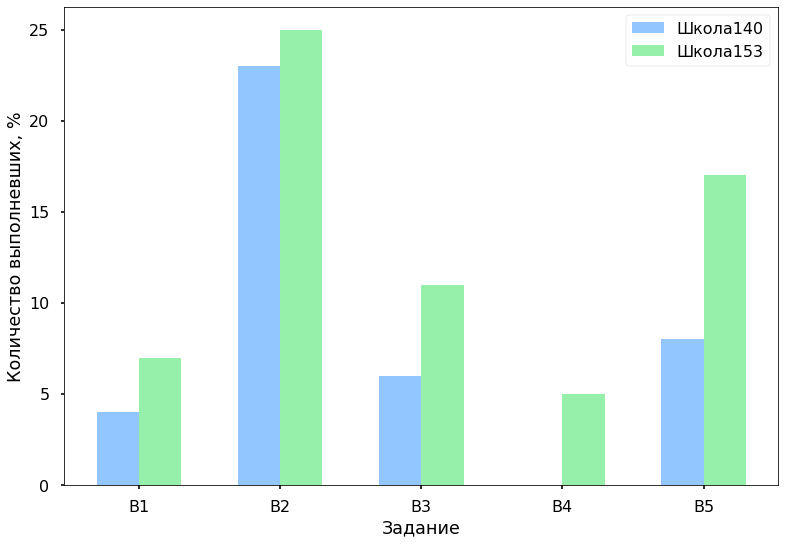

In [33]:
cat_par = [f"В{i}" for i in range(1, len(first_school_lst)+1)]

width = 0.3

x = np.arange(len(cat_par))

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, first_school_lst, width, label='Школа'+str(first_school))
rects2 = ax.bar(x + width/2, second_school_lst, width, label='Школа'+str(second_school))

ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()

plt.xlabel('Задание')
plt.ylabel('Количество выполневших, %')
plt.show()

### Б) по заданиям типа С больше 50%

In [31]:
first_school, second_school = 140, 153
first_school_lst = [0] * 5
second_school_lst = [0] * 5

for row in data[data["№ школы"] == first_school]["Задания с развёрнутым ответом"]:
    for i, el in enumerate(str(row).split('(3)')):
        if el == "2" or el == "3":
            first_school_lst[i] += 1
            
for row in data[data["№ школы"] == second_school]["Задания с развёрнутым ответом"]:
    for i, el in enumerate(str(row).split('(3)')):
        if el == "2" or el == "3":
            second_school_lst[i] += 1
first_school_lst, second_school_lst

([4, 23, 6, 0, 8], [7, 25, 11, 5, 17])

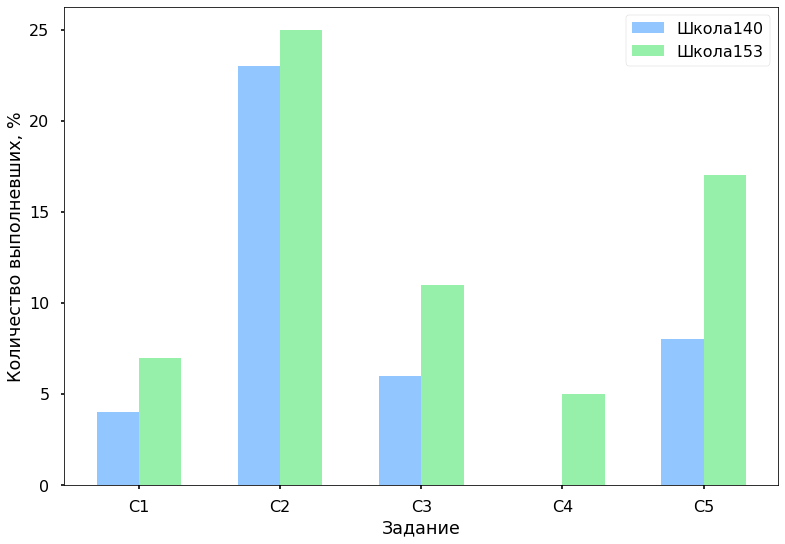

In [34]:
cat_par = [f"C{i}" for i in range(1, len(first_school_lst)+1)]

width = 0.3

x = np.arange(len(cat_par))

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, first_school_lst, width, label='Школа'+str(first_school))
rects2 = ax.bar(x + width/2, second_school_lst, width, label='Школа'+str(second_school))

ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()

plt.xlabel('Задание')
plt.ylabel('Количество выполневших, %')
plt.show()

В школе №140 никто не решил С4 более, чем на 50%

### в) по среднему балу юношей и девушек

In [40]:
F = [data[(data["№ школы"] == first_school) & (data["Пол"] == 'Ж')]["Балл"].mean(),
     data[(data["№ школы"] == second_school) & (data["Пол"] == 'Ж')]["Балл"].mean()]
M = [data[(data["№ школы"] == first_school) & (data["Пол"] == 'М')]["Балл"].mean(),
     data[(data["№ школы"] == second_school) & (data["Пол"] == 'М')]["Балл"].mean()]
F, M

([49.54545454545455, 49.861111111111114], [50.64835164835165, 51.0])

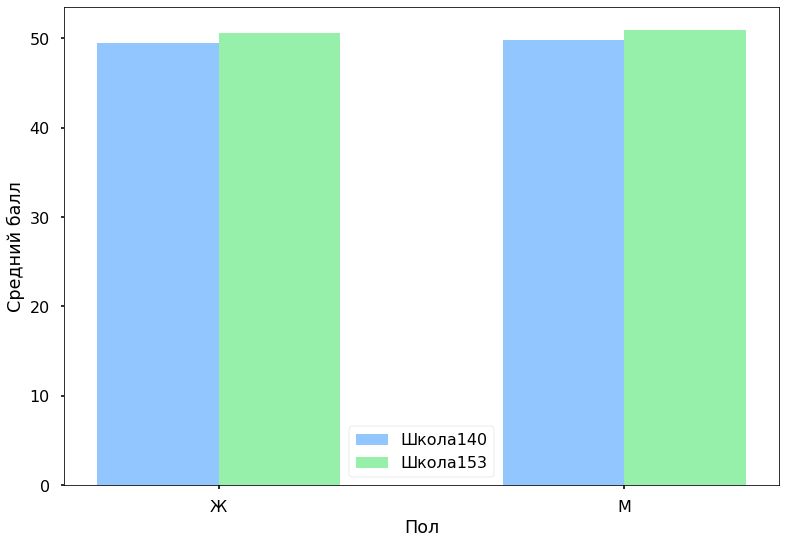

In [42]:
width = 0.3

x = np.arange(len(F))

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, F, width, label='Школа'+str(first_school))
rects2 = ax.bar(x + width/2, M, width, label='Школа'+str(second_school))

ax.set_xticks(x)
ax.set_xticklabels(["Ж", "М"])
ax.legend()

plt.xlabel('Пол')
plt.ylabel('Средний балл')
plt.show()